<a href="https://colab.research.google.com/github/KayalvizhiT513/TNEA-seat-matrix-analysis/blob/main/TNEA_Rank_list_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install PyPDF2 camelot-py pandas openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 85.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import camelot

/usr/local/lib/python3.11/dist-packages/pypdf/_crypt_providers/_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from this module in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


In [72]:
def pdf_to_excel(pdf_path, excel_path):
    # Extract tables from each page of the PDF using camelot
    tables = camelot.read_pdf(pdf_path, pages='all', flavor='stream')

    # List to store all the tables from the PDF
    all_tables = []

    # Loop through each extracted table and append to the all_tables list
    for table in tables:
        all_tables.append(table.df)

    # Concatenate all tables into a single DataFrame
    full_table = pd.concat(all_tables, ignore_index=True)

    # Save the concatenated table to an Excel file
    full_table.to_excel(excel_path, index=False, engine='openpyxl')

    print(f"PDF converted and saved as {excel_path}")

# Example usage
pdf_path = '/content/ACADEMIC_GENERAL_RANK_LIST_2022.pdf'  # Specify the PDF file path
excel_path = 'ACADEMIC_GENERAL_RANK_LIST_2022.xlsx'  # Specify the desired output Excel file path
pdf_to_excel(pdf_path, excel_path)


KeyboardInterrupt: 

In [ ]:
import camelot
import pandas as pd
from multiprocessing import Pool
import time

def extract_tables_from_page_range(pdf_path, page_range):
    start_time = time.time()  # Start timer for this chunk

    # Extract tables from a specific page range of the PDF using camelot
    tables = camelot.read_pdf(pdf_path, pages=page_range, flavor='stream')

    # Calculate time taken for this chunk
    elapsed_time = time.time() - start_time
    print(f"Processed pages {page_range} in {elapsed_time:.2f} seconds.")

    return [table.df for table in tables]

def save_tables_to_excel(all_tables, excel_path):
    start_time = time.time()  # Start timer for saving process

    # Concatenate all extracted tables into a single DataFrame and save to Excel
    full_table = pd.concat(all_tables, ignore_index=True)
    full_table.to_excel(excel_path, index=False, engine='openpyxl')

    # Calculate time taken to save to Excel
    elapsed_time = time.time() - start_time
    print(f"Saved to Excel in {elapsed_time:.2f} seconds.")

def pdf_to_excel(pdf_path, excel_path, num_workers=4, chunk_size=200):
    start_time = time.time()  # Start timer for the entire conversion process

    # Get the total number of pages in the PDF
    total_pages = 3722  # replace with camelot's get_num_pages if necessary

    # Split the pages into chunks for parallel processing
    page_ranges = [(i, min(i + chunk_size - 1, total_pages)) for i in range(1, total_pages, chunk_size)]

    print(f"Starting PDF conversion with {len(page_ranges)} chunks.")

    # Create a pool of workers to process pages in parallel
    with Pool(processes=num_workers) as pool:
        result = pool.starmap(extract_tables_from_page_range, [(pdf_path, f"{start}-{end}") for start, end in page_ranges])

    # Flatten the result list from the pool
    all_tables = [table for sublist in result for table in sublist]

    # Save the results to Excel
    save_tables_to_excel(all_tables, excel_path)

    # Calculate total time taken
    total_elapsed_time = time.time() - start_time
    print(f"Total PDF to Excel conversion completed in {total_elapsed_time:.2f} seconds.")

# Example usage
pdf_path = '/content/ACADEMIC_GENERAL_RANK_LIST_2022.pdf'  # Specify the PDF file path
excel_path = 'ACADEMIC_GENERAL_RANK_LIST_2022.xlsx'  # Specify the desired output Excel file path

pdf_to_excel(pdf_path, excel_path, num_workers=4, chunk_size=200)


Starting PDF conversion with 19 chunks.


In [20]:
rank_list_2025 = pd.read_excel('/content/ACADEMIC_GENERAL_RANK_LIST_2025.xlsx')
rank_list_2025.head()

,0,1,2,3,4,5
0,NaN,NaN,NaN,GENERAL ACADEMIC - PROVISIONAL RANK LIST,NaN,NaN
1,NaN,APPLICATION,AGGREGATE,GENERAL,NaN,COMMUNITY
2,S NO,NaN,NaN,NaN,COMMUNITY,NaN
3,NaN,NUMBER,MARK,RANK,NaN,RANK
4,1,342026,200.000,1,BC,1


In [21]:
columns = ['S NO', 'APPLICATION NUMBER', 'AGGREGATE MARK', 'RANK', 'COMMUNITY', 'COMMUNITY RANK']
rank_list_2025.columns = columns
rank_list_2025.head()

,S NO,APPLICATION NUMBER,AGGREGATE MARK,RANK,COMMUNITY,COMMUNITY RANK
0,NaN,NaN,NaN,GENERAL ACADEMIC - PROVISIONAL RANK LIST,NaN,NaN
1,NaN,APPLICATION,AGGREGATE,GENERAL,NaN,COMMUNITY
2,S NO,NaN,NaN,NaN,COMMUNITY,NaN
3,NaN,NUMBER,MARK,RANK,NaN,RANK
4,1,342026,200.000,1,BC,1


In [23]:
# Drop all rows with S NO column == S NO and reset index
rank_list_2025_dum = rank_list_2025_dum[rank_list_2025_dum['S NO'] != 'S NO'].reset_index(drop=True)
rank_list_2025_dum

,S NO,APPLICATION NUMBER,AGGREGATE MARK,RANK,COMMUNITY,COMMUNITY RANK
0,1,342026,200.000,1,BC,1
1,2,303823,200.000,2,BC,2
2,3,390698,200.000,3,BC,3
3,4,435579,200.000,4,MBC,1
4,5,295204,200.000,5,MBC,2
...,...,...,...,...,...,...
239294,239295,394148,79.000,239295,BCM,12362
239295,239296,378404,78.145,239296,BC,104215
239296,239297,498034,78.000,239297,SCA,5564
239297,239298,304708,77.750,239298,MBC,72095


In [24]:
rank_list_2025_dum.to_excel(excel_path, index=False, engine='openpyxl')

In [33]:
# count unique values under aggregate mark column
rank_list_2025_dum['AGGREGATE MARK'].value_counts()

,count
AGGREGATE MARK,
159.000,1514
161.000,1476
152.000,1466
145.000,1452
154.000,1452
...,...
168.300,1
168.350,1
168.415,1


Text(0.5, 1.0, 'AGGREGATE MARK DISTRIBUTION')

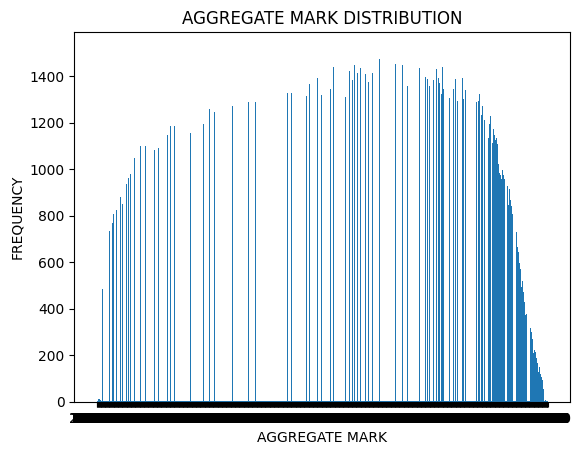

In [37]:
# plot a histogram with aggregated mark in x and frequency in y with rank_list_2025_dum
import matplotlib.pyplot as plt

# Calculate the number of unique values in the 'AGGREGATE MARK' column
num_unique_values = len(rank_list_2025_dum['AGGREGATE MARK'].unique())

# Plot the histogram with the number of bins equal to the number of unique values
plt.hist(rank_list_2025_dum['AGGREGATE MARK'], bins=num_unique_values)
plt.xlabel('AGGREGATE MARK')
plt.ylabel('FREQUENCY')
plt.title('AGGREGATE MARK DISTRIBUTION')
plt.show()


Text(0.5, 1.0, 'AGGREGATE MARK DISTRIBUTION')

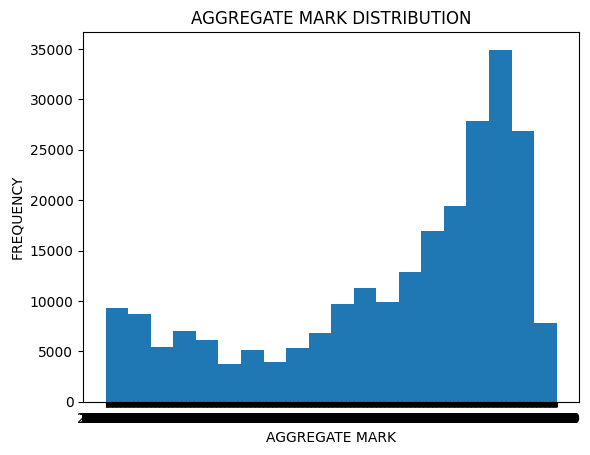

In [36]:
import matplotlib.pyplot as plt
plt.hist(rank_list_2025_dum['AGGREGATE MARK'], bins=20)
plt.xlabel('AGGREGATE MARK')
plt.ylabel('FREQUENCY')
plt.title('AGGREGATE MARK DISTRIBUTION')

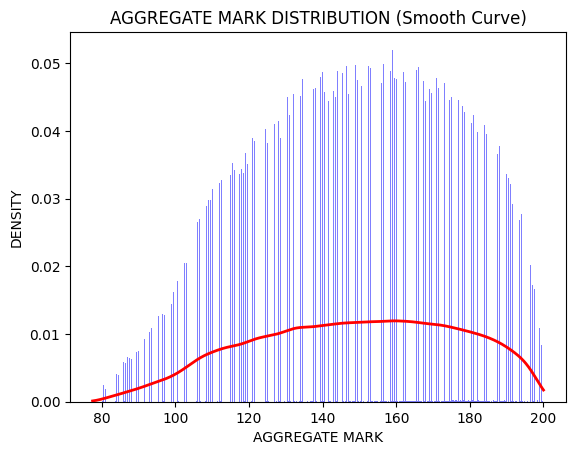

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Data
data = rank_list_2025_dum['AGGREGATE MARK'].dropna()

# Kernel Density Estimation (KDE)
kde = gaussian_kde(data, bw_method='scott')  # You can adjust bandwidth with 'scott' or 'silverman'

# Generate points to evaluate the KDE
x_vals = np.linspace(data.min(), data.max(), 1000)
y_vals = kde(x_vals)

# Plot the histogram
plt.hist(data, bins=num_unique_values, density=True, alpha=0.5, color='blue')

# Plot the KDE smooth curve
plt.plot(x_vals, y_vals, color='red', lw=2)

# Add labels and title
plt.xlabel('AGGREGATE MARK')
plt.ylabel('DENSITY')
plt.title('AGGREGATE MARK DISTRIBUTION (Smooth Curve)')
plt.show()


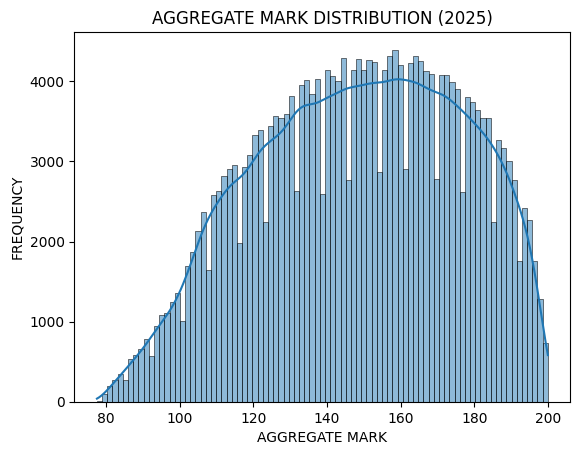

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = rank_list_2025_dum['AGGREGATE MARK'].dropna()

# Kernel Density Estimation (KDE)
kde = gaussian_kde(data, bw_method='scott')  # You can adjust bandwidth with 'scott' or 'silverman'

# Generate points to evaluate the KDE
x_vals = np.linspace(data.min(), data.max(), 1000)
y_vals = kde(x_vals)

# Plot the histogram with density
sns.histplot(rank_list_2025_dum['AGGREGATE MARK'], kde=True)

# Add labels and title
plt.xlabel('AGGREGATE MARK')
plt.ylabel('FREQUENCY')
plt.title('AGGREGATE MARK DISTRIBUTION (2025)')
plt.show()


In [42]:
rank_list_2024 = pd.read_excel('/content/ACADEMIC_GENERAL_RANK_LIST_2024.xlsx')
rank_list_2024.head()

,RANK,APPLICATION NUMBER,NAME OF THE CANDIDATE,DATE OF BIRTH,AGGREGATE MARK,COMMUNITY,COMMUNITY RANK
0,1,286728,THOSITHAA LAKSHMI N,03-08-2006,200,BC,1.0
1,2,216508,Nilanjana K,04-06-2006,200,BC,2.0
2,3,439674,Gokul,04-01-2007,200,BC,3.0
3,4,324007,ASWITHA K,29-01-2007,200,BC,4.0
4,5,213228,SAFIK RAHMAN M,15-01-2007,200,BCM,1.0


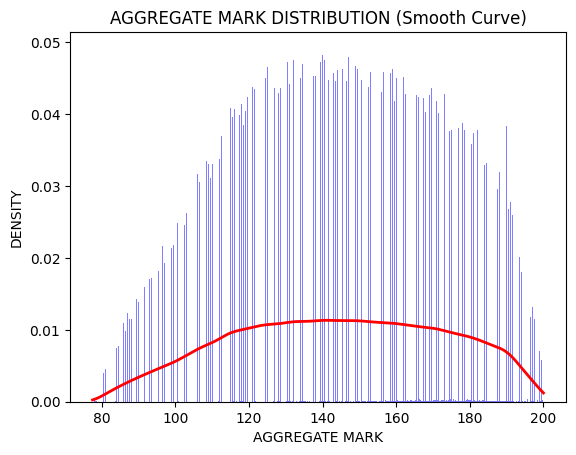

In [66]:
# Ensure the data is numeric and drop any NaN or invalid values
data = rank_list_2024['AGGREGATE MARK'].dropna()

# Check if the data is numeric
data = data.astype(float)

# Kernel Density Estimation (KDE)
kde = gaussian_kde(data, bw_method='scott')  # You can adjust bandwidth with 'scott' or 'silverman'

# Generate points to evaluate the KDE
x_vals = np.linspace(data.min(), data.max(), 1000)
y_vals = kde(x_vals)

# Plot the histogram
plt.hist(data, bins=num_unique_values, density=True, alpha=0.5, color='blue')

# Plot the KDE smooth curve
plt.plot(x_vals, y_vals, color='red', lw=2)

# Add labels and title
plt.xlabel('AGGREGATE MARK')
plt.ylabel('DENSITY')
plt.title('AGGREGATE MARK DISTRIBUTION (Smooth Curve)')
plt.show()

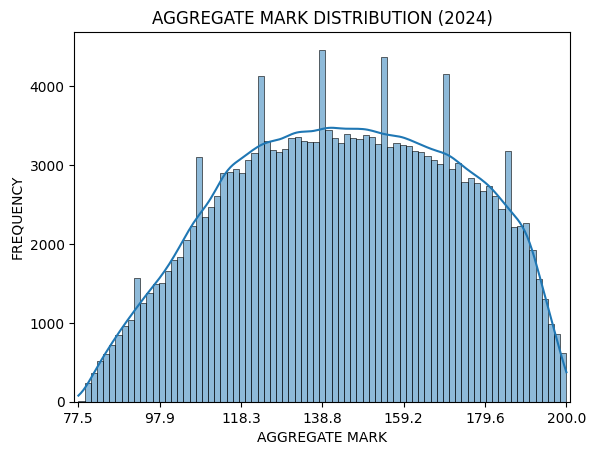

In [70]:
# Data for 2024
data_2024 = rank_list_2024['AGGREGATE MARK'].dropna()

# Check if the data is numeric and convert to float
data_2024 = data_2024.astype(float)

# Kernel Density Estimation (KDE)
kde = gaussian_kde(data_2024, bw_method='scott')  # Adjust bandwidth with 'scott' or 'silverman'

# Generate points to evaluate the KDE
x_vals = np.linspace(data_2024.min(), data_2024.max(), 1000)
y_vals = kde(x_vals)

# Plot the histogram with KDE
sns.histplot(data_2024, kde=True)

# Set the x-axis limits (optional based on data range)
plt.xlim(data_2024.min() - 1, data_2024.max() + 1)

# Adjust the x-axis ticks to make it more readable
plt.xticks(np.linspace(data_2024.min(), data_2024.max(), num=7))  # Adjust number of ticks

# Add labels and title
plt.xlabel('AGGREGATE MARK')
plt.ylabel('FREQUENCY')
plt.title('AGGREGATE MARK DISTRIBUTION (2024)')

# Show the plot
plt.show()